Term Frequency analysis of the works of Jane Austen
----
A lab done in Dr. Nakamura's CSCE 489 class, Data Mining in Social Media

First, we'll (optionally, install and) import the necessary packages for the analysis.

In [8]:
#install.packages("dplyr",       repos='http://cran.us.r-project.org')
#install.packages("janeaustenr", repos='http://cran.us.r-project.org')
#install.packages("tidytext",    repos='http://cran.us.r-project.org')
library(dplyr)
library(janeaustenr)
library(tidytext)

To start, we'll be looking at first the term frequency, then the inverse document frequency coupled with term frequency, more colloquially known as TF-IDF. 
----
Here, we're calculating the most commonly occuring words in Jane Austen's novels.

In [3]:
# First, extract the words from the book and get counts.
# This method is equivalent to building a bag of words model for each book individually.
book_words = austen_books() %>%
  unnest_tokens(word, text) %>%
  count(book, word, sort=T) %>%
  ungroup()

# Next, group the words by book into one large pool and calculate their frequencies over all documents.
total_words = book_words %>%
  group_by(book) %>%
  summarize(total = sum(n))

# All rows from books_words, all columns from both
book_words = left_join(book_words, total_words)

# Print out a peek at the created variable, book_words
book_words

Warning message:
"package 'bindrcpp' was built under R version 3.4.3"Joining, by = "book"


book,word,n,total
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996
Mansfield Park,of,4778,160460
Pride & Prejudice,the,4331,122204
Emma,of,4291,160996
Pride & Prejudice,to,4162,122204


Now that we've gotten bags of words both for individual books, and for the corpus as a whole, we can calculate the term frequency for each term/token/word respective to the corpus.
----

In [4]:
# Term frequency calculation
tf_book_words = book_words %>%
  mutate(tf=n/total)

tf_book_words

book,word,n,total,tf
Mansfield Park,the,6206,160460,0.03867631
Mansfield Park,to,5475,160460,0.03412065
Mansfield Park,and,5438,160460,0.03389007
Emma,to,5239,160996,0.03254118
Emma,the,5201,160996,0.03230515
Emma,and,4896,160996,0.03041069
Mansfield Park,of,4778,160460,0.02977689
Pride & Prejudice,the,4331,122204,0.03544074
Emma,of,4291,160996,0.02665284
Pride & Prejudice,to,4162,122204,0.03405780


Now, let's plot the term frequency across all documents (books) in the corpus.
----

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 896 rows containing non-finite values (stat_bin)."Warning message:
"Removed 1 rows containing missing values (geom_bar)."

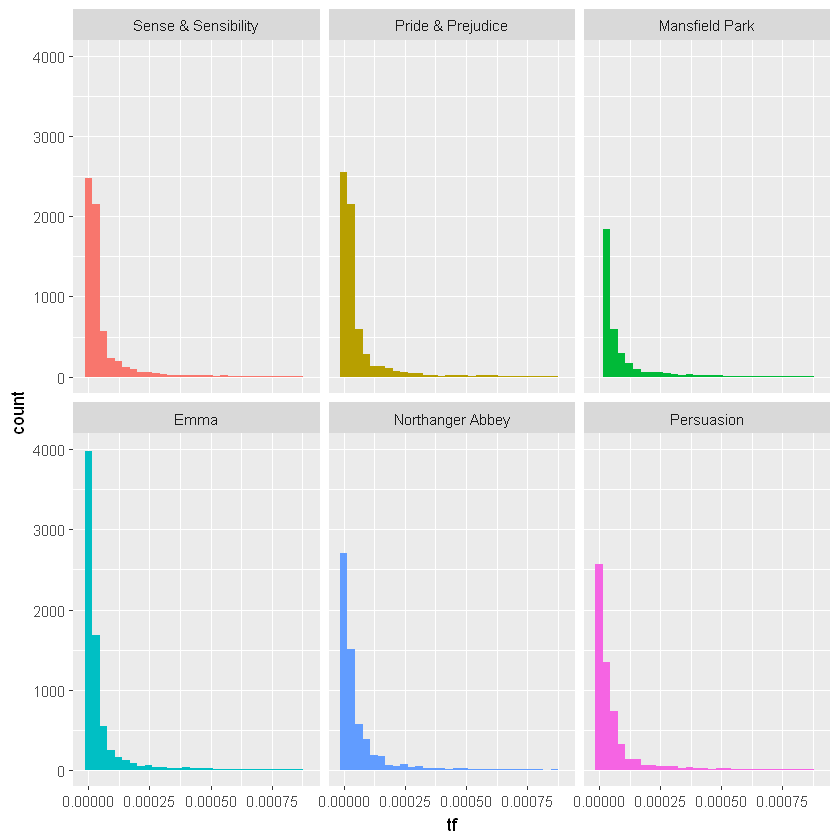

In [7]:
#install.packages("ggplot2",       repos='http://cran.us.r-project.org')
library(ggplot2)

ggplot(tf_book_words, aes(tf, fill=book)) +
  geom_histogram(show.legend=F) +
  xlim(NA, 0.0009) +
  ylim(NA, 4000)   +
  facet_wrap(~book, ncol=3)

Zipf's Law
----
Zipf's law states that the frequency that a word appears is inversely proportional to its rank.

Let's examine that law within the corpus of Jane Austen works.

In [10]:
# First, we'll extract the frequency of each word per document and rank the words accordingly.
freq_by_rank = book_words %>%
  group_by(book) %>%
  mutate(rank = row_number(), tf = n/total)

freq_by_rank

book,word,n,total,rank,tf
Mansfield Park,the,6206,160460,1,0.03867631
Mansfield Park,to,5475,160460,2,0.03412065
Mansfield Park,and,5438,160460,3,0.03389007
Emma,to,5239,160996,1,0.03254118
Emma,the,5201,160996,2,0.03230515
Emma,and,4896,160996,3,0.03041069
Mansfield Park,of,4778,160460,4,0.02977689
Pride & Prejudice,the,4331,122204,1,0.03544074
Emma,of,4291,160996,4,0.02665284
Pride & Prejudice,to,4162,122204,2,0.03405780


Let's visualize Zipf's Law:
----

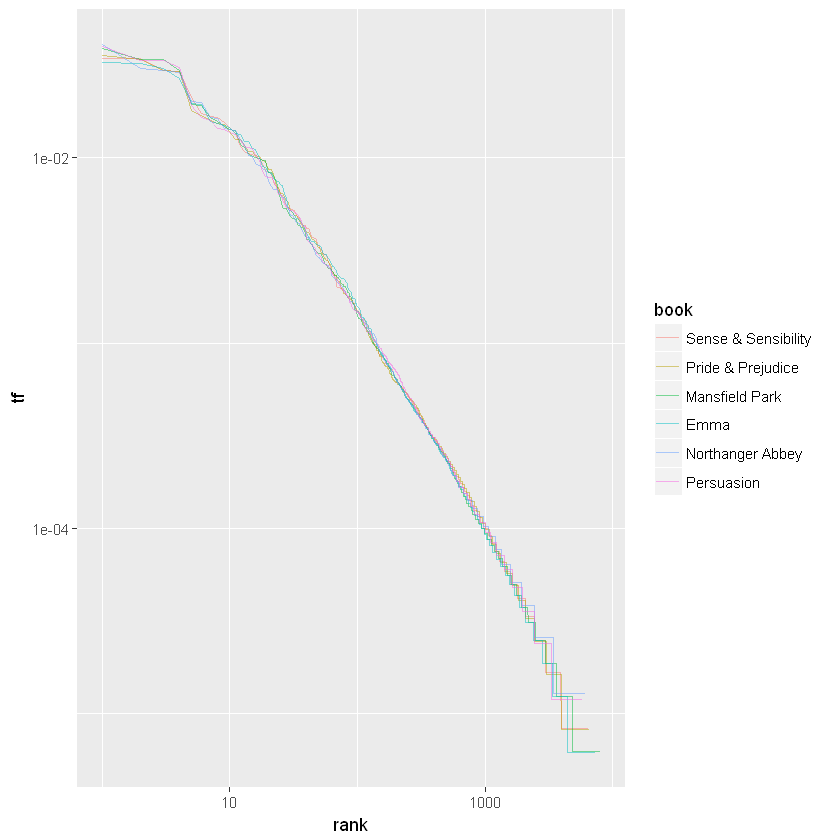

In [11]:
# Visualizing Zipf's law
freq_by_rank %>% 
  ggplot(aes(rank, tf, color=book)) +
  geom_line(alpha=0.5, show.legend=T) +
  scale_x_log10() +
  scale_y_log10() 

As you can see, those words with high frequencies originally were assigned a much lower rank than very rare words.
----
Let's take a look at the interval of words that are within the range 10 $\geq$ x $\geq$ 1000.
Though not explicitly stated in the class, it is a good idea to discard the top n-percent words, as they can sometimes greatly throw off results, if you've got a high number of greatly unique words.

In [12]:
# Check the rank interval for words 10-1000
rank_subset = freq_by_rank %>%
  filter(rank < 1000,
         rank > 10)
lm(formula=log10(tf)~log10(rank), data=rank_subset)


Call:
lm(formula = log10(tf) ~ log10(rank), data = rank_subset)

Coefficients:
(Intercept)  log10(rank)  
    -0.5664      -1.1389  


Now that we've extracted that subset, let's plot a linear model to find the average term frequency make-up of Jane Austen's works.
----

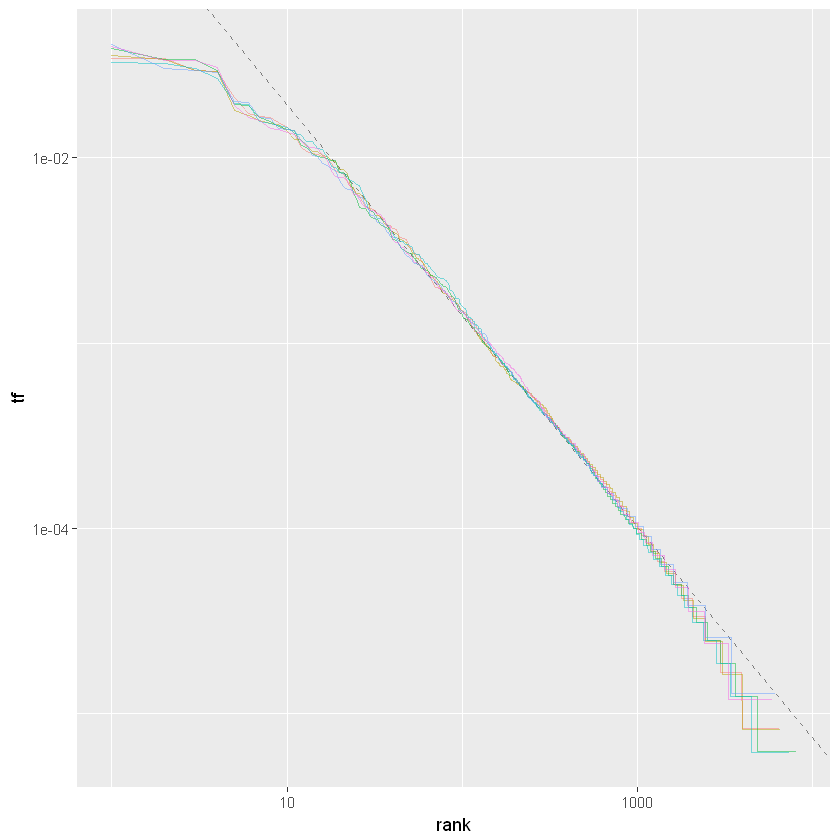

In [17]:
# Check the linear fit for the range 10 <= x <= 1000
freq_by_rank %>%
  ggplot(aes(rank, tf, color=book)) +
  geom_abline(intercept=-.57, slope=-1.14, color="gray50", linetype=2) +
  geom_line(alpha=0.5, show.legend=F) +
  scale_x_log10() +
  scale_y_log10()

Now that we've built the term frequency as well as the document frequency, we can build the real hero, the TF-IDF model!
----

In [18]:
# Extract the term frequency * inverse document frequency
tf_idf_book_words = book_words %>%
  bind_tf_idf(word, book, n) %>%
  arrange(desc(tf_idf))

tf_idf_book_words

book,word,n,total,tf,idf,tf_idf
Sense & Sensibility,elinor,623,119957,0.005193528,1.7917595,0.009305552
Sense & Sensibility,marianne,492,119957,0.004101470,1.7917595,0.007348847
Mansfield Park,crawford,493,160460,0.003072417,1.7917595,0.005505032
Pride & Prejudice,darcy,373,122204,0.003052273,1.7917595,0.005468939
Persuasion,elliot,254,83658,0.003036171,1.7917595,0.005440088
Emma,emma,786,160996,0.004882109,1.0986123,0.005363545
Northanger Abbey,tilney,196,77780,0.002519928,1.7917595,0.004515105
Emma,weston,389,160996,0.002416209,1.7917595,0.004329266
Pride & Prejudice,bennet,294,122204,0.002405813,1.7917595,0.004310639
Persuasion,wentworth,191,83658,0.002283105,1.7917595,0.004090775


Now, we'll use ggplot2 to visualize the TF-IDF model extracted
---

Selecting by tf_idf


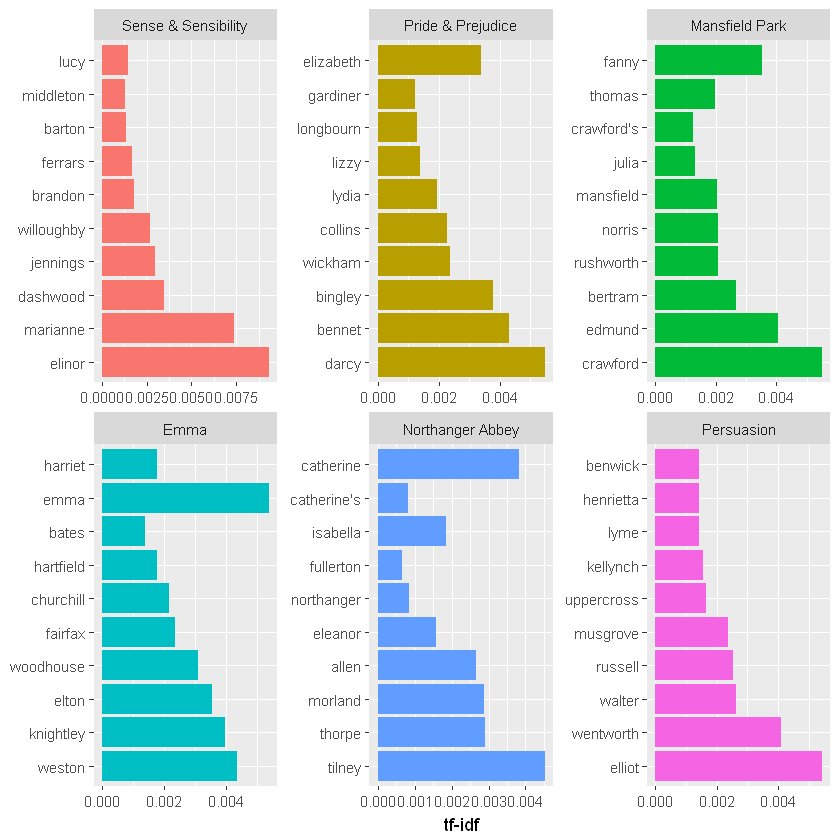

In [19]:
# Visualize the top 10 highest ranked words by book.
tf_idf_book_words %>%
  arrange(tf_idf) %>%
  mutate(word=factor(word, levels = rev(unique(word)))) %>%
  group_by(book) %>%
  top_n(10) %>%
  ungroup %>%
  ggplot(aes(word, tf_idf, fill = book)) +
  geom_col(show.legend = FALSE) +
  labs(x = NULL, y = "tf-idf") +
  facet_wrap(~book, ncol = 3, scales = "free") +
  coord_flip()

Just for fun, let's view the least important words according to TF-IDF
----
Intuitively, we saw earlier that words like "the" "and" "to", etc, are quite common (the most common) across all documents. If the rank of a word is the term frequency multiplied by the $\textbf{inverse}$ document frequency, it would make sense that these words that commonly occur in all documents would recieve a low score, and effectively be smoothed out without having to remove stopwords.

If you notice, these words all have positive term frequencies, but because they appear in all documents, their inverse document frequency is zero. Effectively, they've entirely been zeroed out in the scoring process.

In [20]:
# View the least important words according to TFIDF
tf_idf_book_words %>%
  arrange(tf_idf) %>%
  mutate(word = factor(word, levels = rev(unique(word)))) %>%
  group_by(book) %>%
  filter(tf_idf==0)

book,word,n,total,tf,idf,tf_idf
Mansfield Park,the,6206,160460,0.03867631,0,0
Mansfield Park,to,5475,160460,0.03412065,0,0
Mansfield Park,and,5438,160460,0.03389007,0,0
Emma,to,5239,160996,0.03254118,0,0
Emma,the,5201,160996,0.03230515,0,0
Emma,and,4896,160996,0.03041069,0,0
Mansfield Park,of,4778,160460,0.02977689,0,0
Pride & Prejudice,the,4331,122204,0.03544074,0,0
Emma,of,4291,160996,0.02665284,0,0
Pride & Prejudice,to,4162,122204,0.03405780,0,0


Finally, let's calculate the TF-IDF irrespective of document, and treat the corpus of "Jane Austen's Works" as a singular document.
----
This would be a quite useful method for proving/disambiguating authorship in articles in which the true attribution is not known.

In [33]:
install.packages("tidyr", repos='http://cran.us.r-project.org')

also installing the dependency 'tidyselect'




  There is a binary version available but the source version is later:
           binary source needs_compilation
tidyselect  0.2.3  0.2.4              TRUE

package 'tidyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyr'"


The downloaded binary packages are in
	C:\Users\Jeff\AppData\Local\Temp\RtmpqmvmTg\downloaded_packages


installing the source package 'tidyselect'

Warning message:
"running command '"E:/Anaconda2/R/bin/x64/R" CMD INSTALL -l "E:\Anaconda2\R\library" C:\Users\Jeff\AppData\Local\Temp\RtmpqmvmTg/downloaded_packages/tidyselect_0.2.4.tar.gz' had status 1"Warning message in install.packages("tidyr", repos = "http://cran.us.r-project.org"):
"installation of package 'tidyselect' had non-zero exit status"

In [37]:
library("tidyr")

tf_books = tf_idf_book_words %>%
  select(c(book, word, tf, idf, tf_idf)) %>%
  spread(book, tf, fill=0) %>%
  gather(book, tf, 'Sense & Sensibility':'Persuasion') %>%
  arrange(desc(tf_idf))

tf_books

ERROR: Error in library("tidyr"): there is no package called 'tidyr'
